In [15]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from Runge_exp import train, runge
import matplotlib.pyplot as plt
import numpy as np
import torch

%matplotlib inline
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
USE_WANDB = False
USE_DOUBLE = True

# Fit Runge Function

In [2]:
if(USE_WANDB):
    import wandb
    %env WANDB_API_KEY d190f2bcc7b25562cc1e14760ba03fff5b7cf8ce
    wandb.login()
    wandb.init(project="runge_function", entity="aipp")

In [28]:
degPolynomial = 10
mlp_noLayers = 3
mlp_noFeatures = 50
activationFunction = 'relu' #
runge_factor = 25
no_epochs = 100

In [29]:
myMLP_random, myMLP_chebyshev, myMLP_equidist = train(degPolynomial, mlp_noLayers, mlp_noFeatures, activationFunction, runge_factor, no_epochs, USE_DOUBLE, USE_WANDB)

([0] lr 3.7863e-03, lc 1.0350e-02, le 7.8705e-03
([1] lr 2.3483e-03, lc 4.5798e-03, le 3.1320e-03
([2] lr 1.5630e-03, lc 2.4186e-03, le 1.1664e-04
([3] lr 1.9780e-04, lc 2.9785e-04, le 4.3681e-05
([4] lr 4.9544e-05, lc 3.6327e-05, le 8.1651e-06
([5] lr 1.0665e-05, lc 1.1696e-05, le 2.9722e-06
([6] lr 3.9938e-06, lc 2.9173e-06, le 7.7438e-07
([7] lr 1.3964e-06, lc 1.1035e-06, le 2.7509e-07
([8] lr 9.0948e-07, lc 3.9742e-07, le 1.1010e-07
([9] lr 6.9480e-07, lc 1.3980e-07, le 5.2135e-08
([10] lr 4.7276e-07, lc 8.0674e-08, le 3.0717e-08
([11] lr 3.6393e-07, lc 6.5872e-08, le 2.9883e-08
([12] lr 3.1173e-07, lc 5.4463e-08, le 2.9883e-08
([13] lr 2.0126e-07, lc 4.5125e-08, le 2.9883e-08
([14] lr 1.6526e-07, lc 4.4143e-08, le 2.9883e-08
([15] lr 1.6479e-07, lc 4.4143e-08, le 2.9883e-08
([16] lr 1.1797e-07, lc 4.4143e-08, le 2.9883e-08
([17] lr 1.1540e-07, lc 4.4143e-08, le 2.9883e-08
([18] lr 8.7816e-08, lc 4.4143e-08, le 2.9883e-08
([19] lr 8.4521e-08, lc 4.4143e-08, le 2.9883e-08
([20] lr 7

# Extrapolation analysis

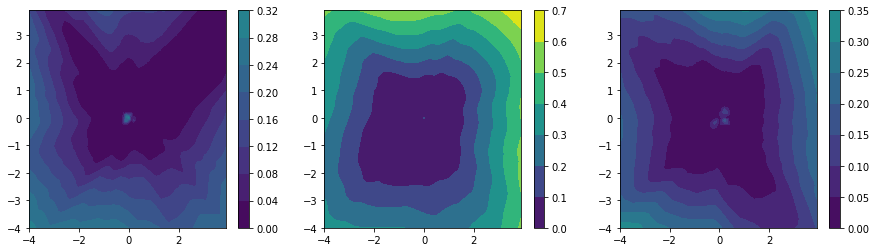

In [30]:
dtype = torch.FloatTensor
if(USE_DOUBLE):
    dtype = torch.DoubleTensor

x_1_extrapol = np.arange(-4,4,0.1).reshape((-1,1))
x_2_extrapol = np.arange(-4,4,0.1).reshape((-1,1))
xx_extrapol, yy_extrapol = np.meshgrid(x_1_extrapol, x_2_extrapol)
x_extrapol = np.concatenate((xx_extrapol.reshape((-1,1)),yy_extrapol.reshape((-1,1))), axis=1)
y_extrapol = runge(x_extrapol, runge_factor)
x_torch_extrapol = dtype(x_extrapol).to(device)

y_hat_random_extrapol = myMLP_random(x_torch_extrapol).squeeze().detach().cpu().numpy()
y_hat_chebyshev_extrapol = myMLP_chebyshev(x_torch_extrapol).squeeze().detach().cpu().numpy()
y_hat_equidist_extrapol = myMLP_equidist(x_torch_extrapol).squeeze().detach().cpu().numpy()

plt.rcParams['figure.figsize'] = [15, 4]
max_clim = max(np.max(abs(y_hat_random_extrapol-y_extrapol)), np.max(abs(y_hat_equidist_extrapol-y_extrapol)), np.max(abs(y_hat_chebyshev_extrapol-y_extrapol)))
plt.subplot(1, 3, 1)
plt.tricontourf(x_extrapol[:,0], x_extrapol[:,1], abs(y_hat_random_extrapol-y_extrapol))
plt.clim(0, max_clim)
plt.colorbar()
plt.subplot(1, 3, 2)
plt.tricontourf(x_extrapol[:,0], x_extrapol[:,1], abs(y_hat_equidist_extrapol-y_extrapol))
plt.clim(0, max_clim)
plt.colorbar()
plt.subplot(1, 3, 3)
plt.tricontourf(x_extrapol[:,0], x_extrapol[:,1], abs(y_hat_chebyshev_extrapol-y_extrapol))
plt.clim(0, max_clim)
plt.colorbar()

In [31]:
def extrapol_performance(net,dtype,distance_from_zero):
    length = distance_from_zero  #np.sqrt(np.random.uniform(0, 1))
    angle = np.pi * np.random.uniform(0, 2, size = (1024,))
    x_1_extrapol = length * np.cos(angle)
    x_2_extrapol = length * np.sin(angle)

    x_extrapol = np.concatenate((x_1_extrapol.reshape((-1,1)),x_2_extrapol.reshape((-1,1))), axis=1)
    y_extrapol = runge(x_extrapol, runge_factor)
    x_torch_extrapol = dtype(x_extrapol).to(device)
    y_hat_random_extrapol = np.max(abs(net(x_torch_extrapol).squeeze().detach().cpu().numpy() - y_extrapol))
    return y_hat_random_extrapol

dist = 2
[extrapol_performance(myMLP_random, dtype, dist),
    extrapol_performance(myMLP_chebyshev, dtype, dist),
    extrapol_performance(myMLP_equidist, dtype, dist)]

[0.1066075821957134, 0.07997581484723779, 0.19406975972815488]

In [32]:
dist = 4
[extrapol_performance(myMLP_random, dtype, dist),
    extrapol_performance(myMLP_chebyshev, dtype, dist),
    extrapol_performance(myMLP_equidist, dtype, dist)]

[0.2600752322341866, 0.30349038861352007, 0.5836007852138257]

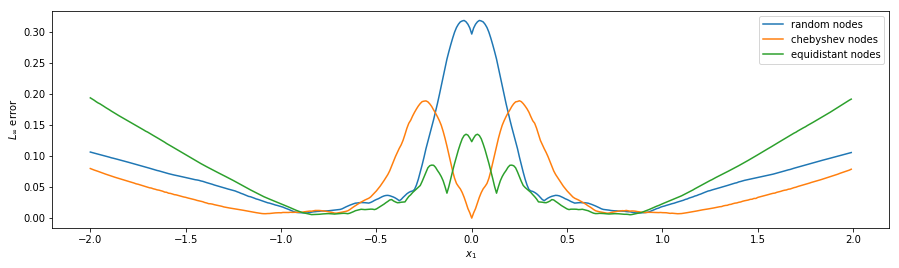

In [33]:
linf = []
scaling = 100.
range_max = 400
xax = []
for i in range(range_max):
    dist = float(i) / scaling - ((0.5 * range_max) / scaling)
    xax.append(dist)
    linf_i = [extrapol_performance(myMLP_random, dtype, dist),
    extrapol_performance(myMLP_chebyshev, dtype, dist),
    extrapol_performance(myMLP_equidist, dtype, dist)]
    #wandb.log({'Linf-random': linf_i[0], 'Linf-cheby': linf_i[1], 'Linf-equidist': linf_i[2], 'position': dist})
    linf.append(linf_i)
    
plt.plot(xax, np.array(linf)[:,0], xax, np.array(linf)[:,1], xax, np.array(linf)[:,2])
plt.legend(['random nodes', 'chebyshev nodes', 'equidistant nodes'])
plt.ylabel('$L_\infty$ error')
plt.xlabel('$x_1$')
plt.show()